In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import task_2 as util
from typing import Callable

In [2]:
datasets = util.generate_datasets()
classifiers = ("A", "B")
LABEL = "label"


acc: Callable[[pd.Series, pd.Series], float] = lambda a, b : np.sum(a==b) / len(a)

for label, dataset in datasets.items():
    print(f"------------ Dataset: {label} --------------")
    for classifier in classifiers:
        print(f"Classifier: {classifier}")
        eval = util.eval_classification(dataset)
        cm = util.get_confusion_matrix(eval, classifier, 0.5)
        print(f"amount of class 0: {len(eval[eval[LABEL] == 0])}")
        print(f"amount of class 1: {len(eval[eval[LABEL] == 1])}")
        print(f"amount of predicted class 0: {len(eval[eval[classifier] == 0])}")
        print(f"amount of predicted class 1: {len(eval[eval[classifier] == 1])}")
        print(f"accuracy: {acc(eval[classifier], eval[LABEL])}")
        print(f"f1 score: {util.f_score(util.get_precision(cm), util.get_sensitivity(cm))}")
        print(cm)


------------ Dataset: x --------------
Classifier: A
amount of class 0: 10000
amount of class 1: 1000
amount of predicted class 0: 7364
amount of predicted class 1: 3636
accuracy: 0.6754545454545454
f1 score: 0.22993960310612596
{'tp': 533, 'fp': 3103, 'fn': 467, 'tn': 6897, 't': 0.5}
Classifier: B
amount of class 0: 10000
amount of class 1: 1000
amount of predicted class 0: 7247
amount of predicted class 1: 3753
accuracy: 0.6879090909090909
f1 score: 0.27771933515674313
{'tp': 660, 'fp': 3093, 'fn': 340, 'tn': 6907, 't': 0.5}
------------ Dataset: y --------------
Classifier: A
amount of class 0: 1000
amount of class 1: 10000
amount of predicted class 0: 5358
amount of predicted class 1: 5642
accuracy: 0.5465454545454546
f1 score: 0.6811149469377317
{'tp': 5327, 'fp': 315, 'fn': 4673, 'tn': 685, 't': 0.5}
Classifier: B
amount of class 0: 1000
amount of class 1: 10000
amount of predicted class 0: 4055
amount of predicted class 1: 6945
accuracy: 0.6611818181818182
f1 score: 0.7800531130

In [3]:
# Part b
thresholds = np.arange(0.1, 1, 0.05)

# calculate every confusion matrix and save to a dictionary to save computation time later on
cms = {}
for label, dataset in datasets.items():
    lcm = {}
    for classifier in classifiers:
        lcm[classifier] = util.get_cms(dataset, thresholds, classifier)
    cms[label] = lcm


--------------------x--------------------


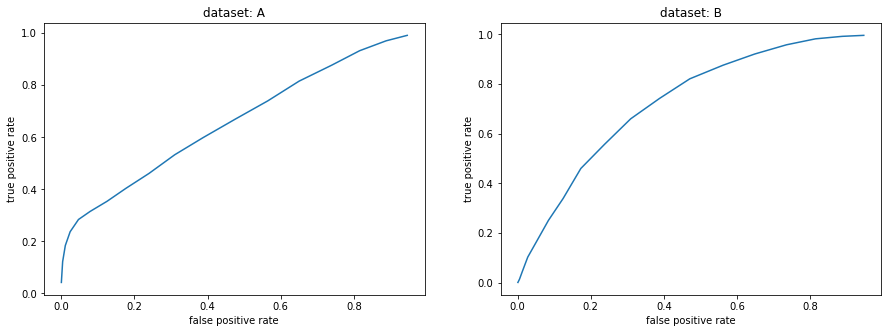

aucs: [0.6434513, 0.7115714000000001]
dummy aucs: [0.5296666666666667, 0.549111111111111]
--------------------y--------------------


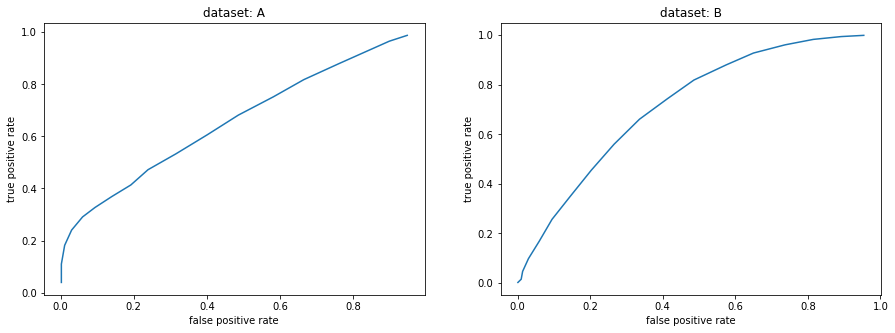

aucs: [0.6404987999999998, 0.7051124]
dummy aucs: [0.5329777777777778, 0.5513055555555556]
--------------------z--------------------


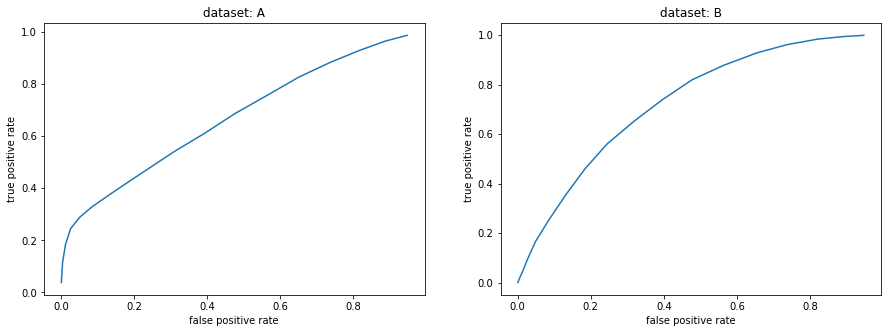

aucs: [0.65262817, 0.7092426300000001]
dummy aucs: [0.5368388888888888, 0.5509277777777777]


In [4]:
# Plot ROC Curve and calc AUC Value

aucs_ = {}
for label, dataset in datasets.items():
    # load the pre calculated confuxion matrixes
    _cms = cms[label]
    aucs = []
    dummy_aucs = []
    fig = plt.figure(figsize=(15, 5))
    for j, classifier in enumerate(classifiers):
        fp_rates, tp_rates = util.roc_curve(_cms[classifier])

        # this is an interesting observation, we cannot approx auc with the 
        # mean of the y values, because of their distribution
        dummy_aucs.append(np.mean(tp_rates))
        aucs.append(util.calc_auc(fp_rates, tp_rates))
        ax = fig.add_subplot(1, 2, j + 1)
        ax.set_title(f"dataset: {classifier}")
        ax.set_ylabel("true positive rate")
        ax.set_xlabel("false positive rate")
        ax.plot(fp_rates, tp_rates)

    print(f"--------------------{label}--------------------")
    plt.show()
    print(f"aucs: {aucs}")
    print(f"dummy aucs: {dummy_aucs}")

    # save into dict to compare the scores later on
    aucs_[label] = aucs



--------------------x--------------------


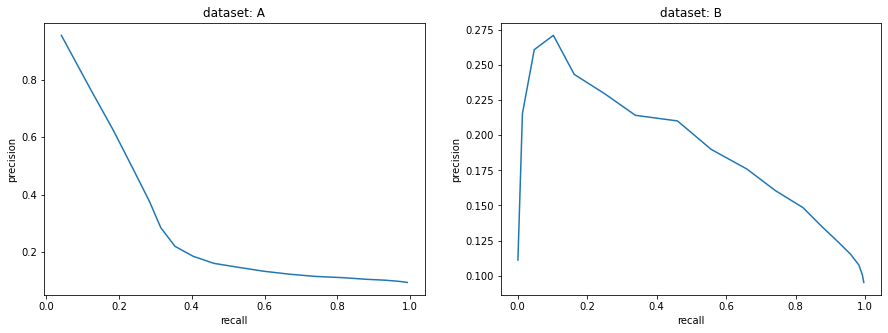

aucs: [0.7092426300000001, 0.7092426300000001]
dummy aucs: [0.28364960812649387, 0.17265655770868046]
--------------------y--------------------


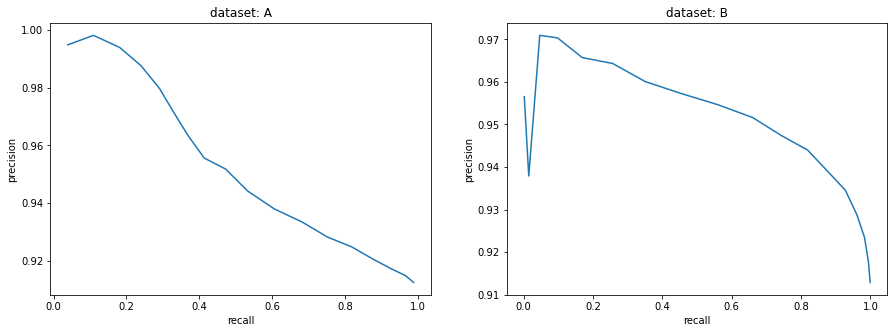

aucs: [0.7092426300000001, 0.7092426300000001]
dummy aucs: [0.9517038850076511, 0.9464855798825172]
--------------------z--------------------


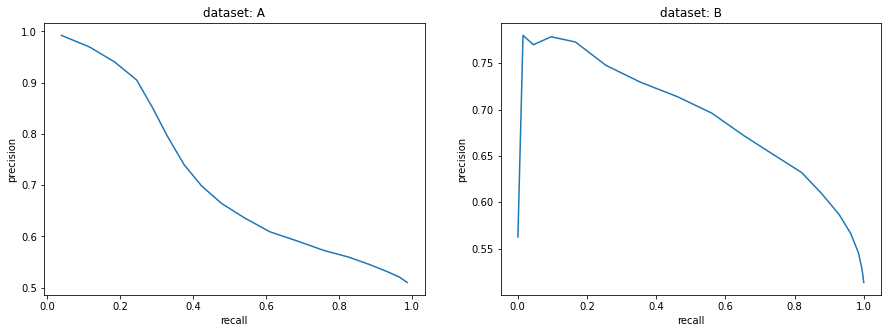

aucs: [0.7092426300000001, 0.7092426300000001]
dummy aucs: [0.7018070614468506, 0.6585500360180148]


In [5]:
# Plot PR Curve and calc AUPR Value

aupr_ = {}
for label, dataset in datasets.items():
    _cms = cms[label]
    aupr = []
    dummy_aupr = []
    fig = plt.figure(figsize=(15, 5))
    for j, classifier in enumerate(classifiers):
        precision, recall = util.precision_recall_curve(_cms[classifier])
        dummy_aupr.append(np.mean(precision))
        aupr.append(util.calc_aupr(fp_rates, tp_rates))
        ax = fig.add_subplot(1, 2, j + 1)
        ax.set_title(f"dataset: {classifier}")
        ax.set_ylabel("precision")
        ax.set_xlabel("recall")
        ax.plot(recall, precision)

    print(f"--------------------{label}--------------------")
    plt.show()
    print(f"aucs: {aupr}")
    print(f"dummy aucs: {dummy_aupr}")
    aupr_[label] = aupr


--------------------x--------------------


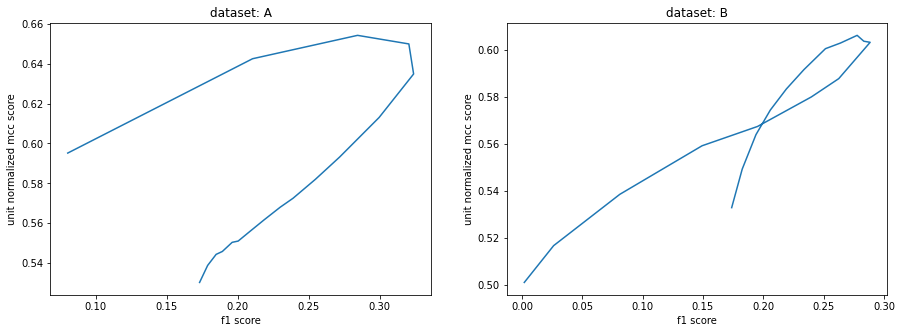

mcc f1 scores (p0, p1, ti): [(0.649880578590617, 0.3204868154158215, 0.8000000000000002), (0.6033636211070894, 0.288491690185011, 0.6000000000000002)]
--------------------y--------------------


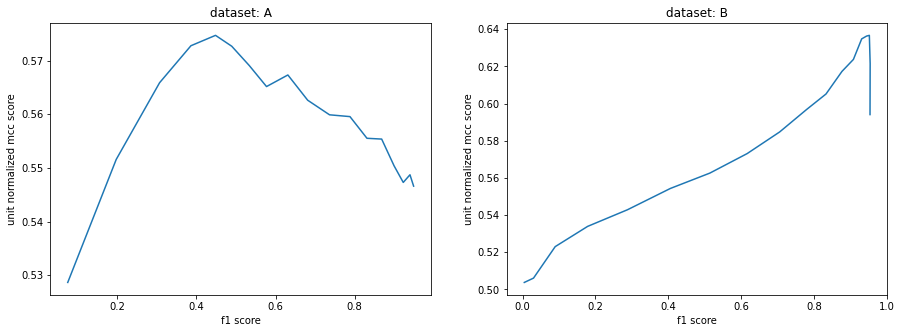

mcc f1 scores (p0, p1, ti): [(0.5487140976572831, 0.9395796847635728, 0.15000000000000002), (0.6366445380100962, 0.9522886897553886, 0.20000000000000004)]
--------------------z--------------------


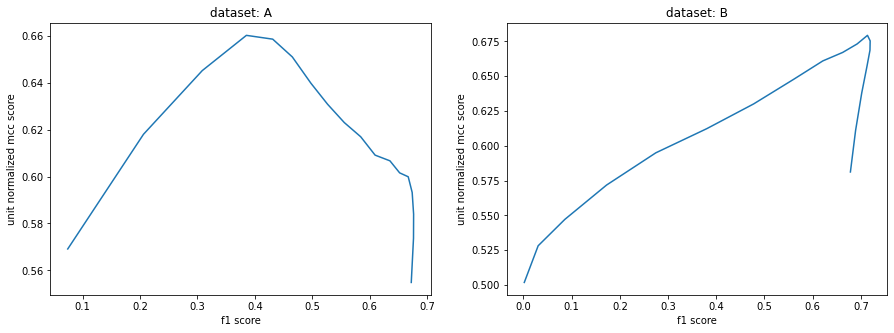

mcc f1 scores (p0, p1, ti): [(0.5999219189535803, 0.6672317752482441, 0.30000000000000004), (0.6754323319842498, 0.7193643512450852, 0.3500000000000001)]


In [6]:
# Part C
scores_ = {}

for label, dataset in datasets.items():
    _cms = cms[label]
    scores = []
    fig = plt.figure(figsize=(15, 5))
    for j, classifier in enumerate(classifiers):
        un_mcc_scores, fone_scores = util.mcc_fone_curve(_cms[classifier])
        scores.append(util.get_mcc_fone_score(un_mcc_scores, fone_scores, thresholds))

        ax = fig.add_subplot(1, 2, j + 1)
        ax.set_title(f"dataset: {classifier}")
        ax.set_ylabel("unit normalized mcc score")
        ax.set_xlabel("f1 score")

        ax.plot(fone_scores, un_mcc_scores)

    print(f"--------------------{label}--------------------")
    plt.show()
    print(f"mcc f1 scores (p0, p1, ti): {scores}")

    scores_[label] = scores


In [7]:
# Compare scres

for label, _ in datasets.items():
    print(f"----------------Dataset: {label}----------------")
    for i in range(len(aucs_[label])):
        print(f"Classifier: {classifiers[i]}")
        print(f"AUC SCORE: {aucs_[label][i]}")
        print(f"AUPR SCORE: {aupr_[label][i]}")
        print(f"MCC-F1 SCORE: (x0, x1, ti) {scores_[label][i]}")

----------------Dataset: x----------------
Classifier: A
AUC SCORE: 0.6434513
AUPR SCORE: 0.7092426300000001
MCC-F1 SCORE: (x0, x1, ti) (0.649880578590617, 0.3204868154158215, 0.8000000000000002)
Classifier: B
AUC SCORE: 0.7115714000000001
AUPR SCORE: 0.7092426300000001
MCC-F1 SCORE: (x0, x1, ti) (0.6033636211070894, 0.288491690185011, 0.6000000000000002)
----------------Dataset: y----------------
Classifier: A
AUC SCORE: 0.6404987999999998
AUPR SCORE: 0.7092426300000001
MCC-F1 SCORE: (x0, x1, ti) (0.5487140976572831, 0.9395796847635728, 0.15000000000000002)
Classifier: B
AUC SCORE: 0.7051124
AUPR SCORE: 0.7092426300000001
MCC-F1 SCORE: (x0, x1, ti) (0.6366445380100962, 0.9522886897553886, 0.20000000000000004)
----------------Dataset: z----------------
Classifier: A
AUC SCORE: 0.65262817
AUPR SCORE: 0.7092426300000001
MCC-F1 SCORE: (x0, x1, ti) (0.5999219189535803, 0.6672317752482441, 0.30000000000000004)
Classifier: B
AUC SCORE: 0.7092426300000001
AUPR SCORE: 0.7092426300000001
MCC-F1

In [8]:
# Part d
from sklearn.model_selection import train_test_split

dataset = datasets["x"]

train, test = train_test_split(dataset, test_size=0.1, stratify=dataset["label"], random_state=42)
thresholds = np.arange(0.1, 1, 0.01)
cms = util.get_cms(test, thresholds, "A")

f_one_scores = []
ts = []
for t, cm in cms.items():
    if cm["tp"] == 0:
        continue
    f_one_scores.append(util.f_score(util.get_precision(cm), util.get_sensitivity(cm), beta=1))
    ts.append(t)

i = np.argmax(np.array(f_one_scores))
print(f"best f1 score on test set with threshold: {ts[i]:.2f}, with score: {f_one_scores[i]}")
# get cm for train set with threshold ts[i]
train_cm = util.get_confusion_matrix(util.eval_classification(train, threshold=ts[i]), "A", ts[i])
default_cm = util.get_confusion_matrix(util.eval_classification(train), "A", 0.5)

print(f"f1 score for data_set with threshold: {ts[i]:.2f}, with score: \
    {util.f_score(util.get_precision(train_cm), util.get_sensitivity(train_cm), beta=1)}")
print(f"f1 score for data_set with threshold: 0.5, with score: \
    {util.f_score(util.get_precision(default_cm), util.get_sensitivity(default_cm), beta=1)}")


best f1 score on test set with threshold: 0.8099999999999996, with score: 0.33557046979865773
f1 score for data_set with threshold: 0.81, with score:     0.3104247104247104
f1 score for data_set with threshold: 0.5, with score:     0.23121110579224505
